In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('./csv/clubmed_HW2.csv') 

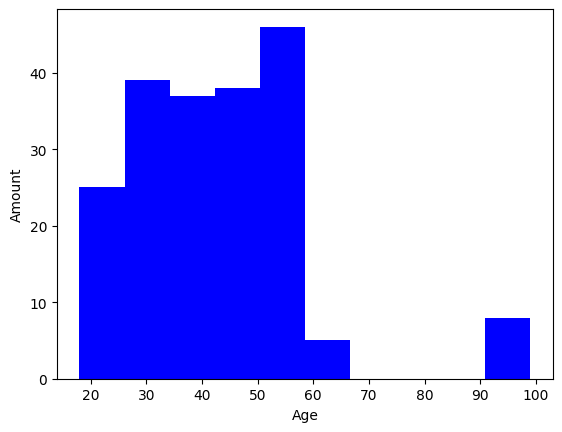

In [3]:
plt.xlabel('Age')
plt.ylabel('Amount')
plt.hist(df.age, color='b')
plt.show()

(array([11., 18., 35., 20., 23., 32., 28., 23.,  0.,  0.,  0.,  0.,  0.,
         0.,  8.]),
 array([18. , 23.4, 28.8, 34.2, 39.6, 45. , 50.4, 55.8, 61.2, 66.6, 72. ,
        77.4, 82.8, 88.2, 93.6, 99. ]),
 <BarContainer object of 15 artists>)

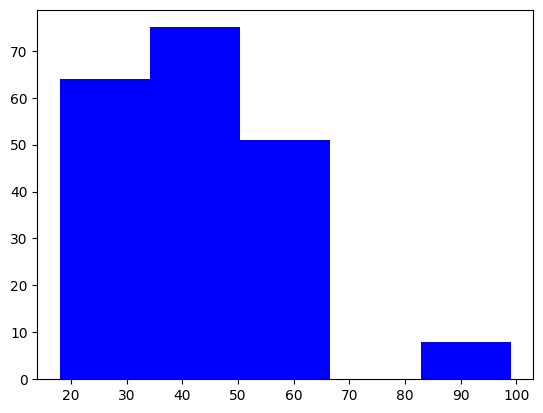

In [4]:
plt.hist(df.age, bins=5, color='b')
plt.hist(df.age, bins=15, color='b')

<Axes: title={'center': 'Membership'}, xlabel='Is a Member', ylabel='Count'>

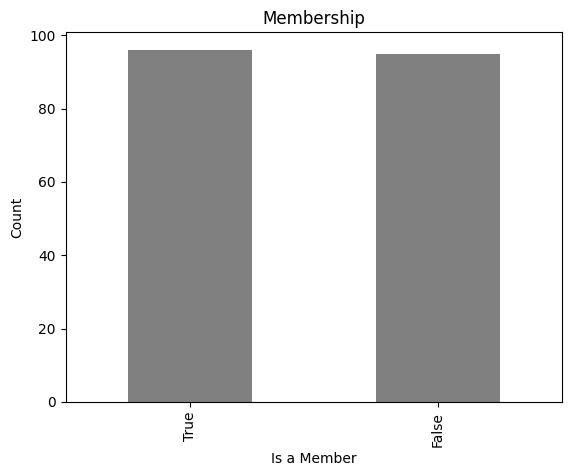

In [5]:
df.club_member.value_counts().plot(kind='bar', title='Membership', xlabel='Is a Member', ylabel='Count', color='grey')

(array([ 2., 16., 25., 38., 41., 25., 28., 12.,  5.,  3.]),
 array([1.88081359, 1.94966962, 2.01852566, 2.08738169, 2.15623772,
        2.22509375, 2.29394978, 2.36280581, 2.43166185, 2.50051788,
        2.56937391]),
 <BarContainer object of 10 artists>)

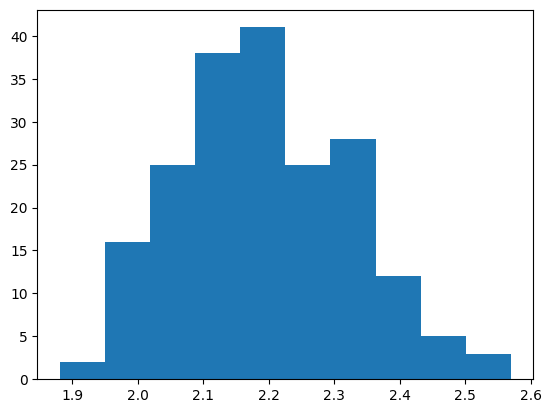

In [6]:
df['log_roomprice'] = df['room_price'].mask(df['room_price'] < 1, 1)
df['log_roomprice'] = np.log10(df['log_roomprice'])
plt.hist(df.log_roomprice)

<Axes: xlabel='sex'>

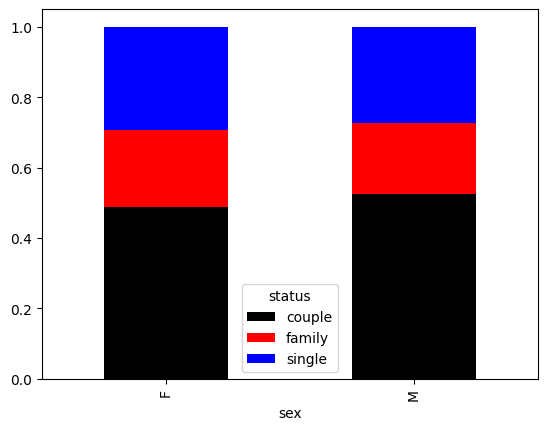

In [7]:
df_status_sex_bars2 = df.groupby(['sex', 'status'])[['status']].count()
df_status_sex_bars2.rename(columns={"status": "amount"}, inplace=True) # Renaming
df_status_sex_bars2 = df_status_sex_bars2.reset_index('status') # Index by status
df_status_sex_bars2 = df_status_sex_bars2.pivot(columns='status', values='amount')
df_status_sex_bars2 = df_status_sex_bars2.div(df_status_sex_bars2.sum(axis=1), axis=0) # Making the table a proportional one
df_status_sex_bars2.plot(kind='bar', stacked=True, color=['black', 'red', 'blue']) # Plotting as a stacked colored bar chart.

<Axes: xlabel='status'>

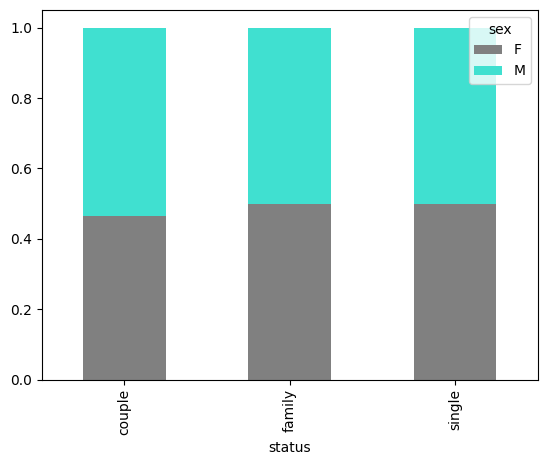

In [8]:
df_status_sex_bars = df.groupby(['status', 'sex'])[['sex']].count()
df_status_sex_bars.rename(columns={"sex": "amount"}, inplace=True)
df_status_sex_bars = df_status_sex_bars.reset_index('sex')
df_status_sex_bars = df_status_sex_bars.pivot(columns='sex', values='amount')
df_status_sex_bars = df_status_sex_bars.div(df_status_sex_bars.sum(axis=1), axis=0)
df_status_sex_bars.plot(kind='bar', stacked=True, color=['grey', 'turquoise'])

<Axes: title={'center': 'Room service orders'}, xlabel='nights', ylabel='amount'>

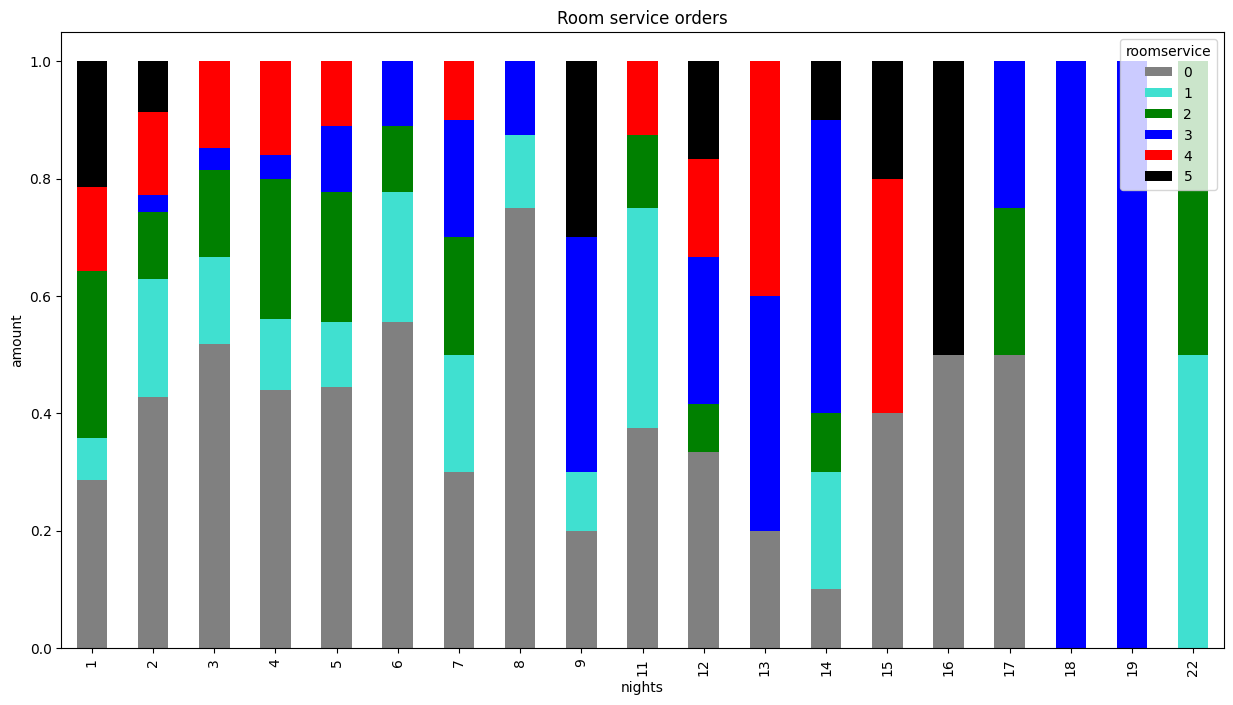

In [9]:
df_roomservice_nights_bars = df.groupby(['nights', 'roomservice'])[['roomservice']].count()
df_roomservice_nights_bars.rename(columns={"roomservice": "amount"}, inplace=True)
df_roomservice_nights_bars = df_roomservice_nights_bars.reset_index('roomservice')
df_roomservice_nights_bars = df_roomservice_nights_bars.pivot(columns='roomservice', values='amount')
df_roomservice_nights_bars = df_roomservice_nights_bars.div(df_roomservice_nights_bars.sum(axis=1), axis=0)
df_roomservice_nights_bars.plot(title='Room service orders', kind='bar', figsize=(15, 8), stacked=True, ylabel='amount',
                                color=['grey', 'turquoise', 'green', 'blue', 'red', 'black'])

In [10]:
df3 = df.groupby(['sex', 'club_member'])[['club_member']].count()
print(df3)
df4 = df.groupby(['sex', 'status'])[['status']].count()
print(df4)

                 club_member
sex club_member             
F   False                 69
    True                  23
M   False                 26
    True                  73
            status
sex status        
F   couple      45
    family      20
    single      27
M   couple      52
    family      20
    single      27


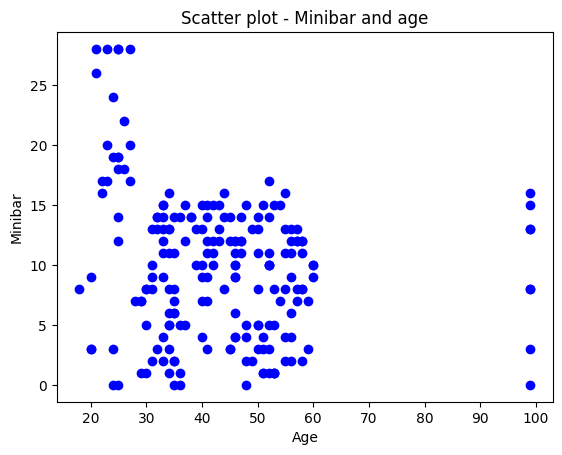

In [11]:
plt.scatter(df.age,df.minibar, color='blue') # Creating the bar chart.
plt.title ('Scatter plot - Minibar and age') # Title given
plt.ylabel ('Minibar') # Giving labels
plt.xlabel ('Age')
plt.show()


In [12]:
room_price_notna = df[df[['room_price']].notna()]['room_price'] # Removing unknown elements.
print (room_price_notna.describe(include='all'))
Q1 = room_price_notna.quantile(0.25) # first quantile
Q3 = room_price_notna.quantile(0.75) # third quantile
IQR = Q3-Q1
print (IQR)

count    195.000000
mean     163.389744
std       52.920694
min       76.000000
25%      126.000000
50%      151.000000
75%      193.500000
max      371.000000
Name: room_price, dtype: float64
67.5


In [13]:
median = room_price_notna.median()
print (median)
room_price_notna[room_price_notna <= room_price_notna.median()].count()

151.0


np.int64(100)

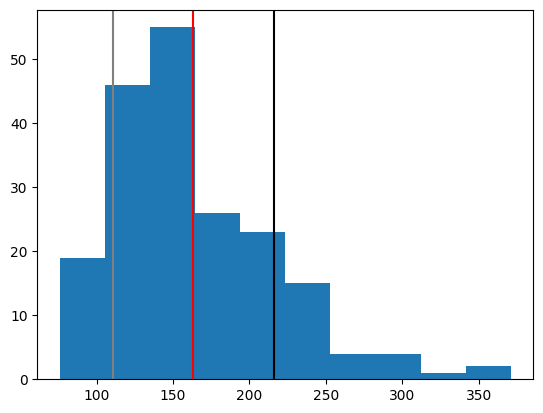

In [14]:
plt.hist(room_price_notna, bins = 10)
mn = room_price_notna.mean() # Calculating mean
std = room_price_notna.std() # Calculating std
plt.axvline(x=mn, color='red') # mean line
plt.axvline(x=mn+std, color = 'black') # mean + std line
plt.axvline(x=mn-std, color = 'grey') # mean - std line.

(array([19., 46., 55., 26., 23., 15.,  4.,  4.,  1.,  2.]),
 array([ 76. , 105.5, 135. , 164.5, 194. , 223.5, 253. , 282.5, 312. ,
        341.5, 371. ]),
 <BarContainer object of 10 artists>)

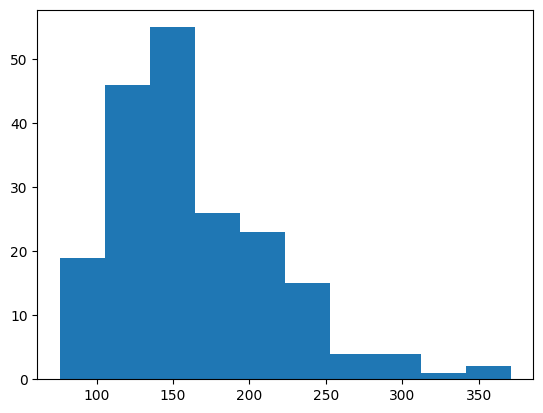

In [15]:
plt.hist(room_price_notna, bins = 10)

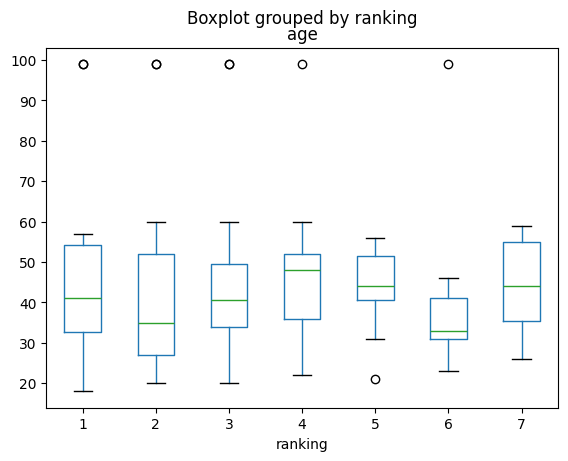

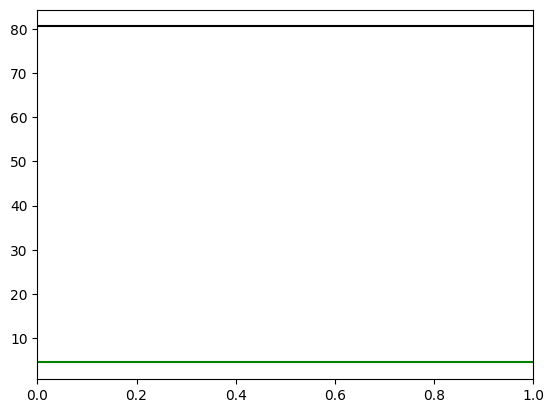

In [16]:
df_ranking = df.boxplot(column = ['age'], by = 'ranking', grid = False)
plt.show()
# Rank number 2
age_Q1 = df.age.quantile(0.25) # Calculating quantiles.
age_Q3 = df.age.quantile(0.75)
age_IQR = age_Q3 - age_Q1 # Calculating IQR
lowerThreshold = age_Q1 - age_IQR*1.5  # Lower threshold
upperThreshold = age_Q3 + age_IQR*1.5 # Upper threshold
plt.axhline(y=lowerThreshold, color = 'green')
plt.axhline (y=upperThreshold, color = 'black')
plt.show()

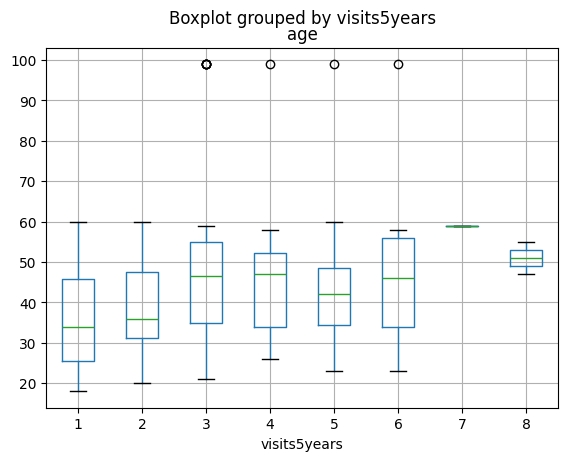

In [17]:

df_visits5years = df.boxplot(column = ['age'], by = 'visits5years', grid = True)

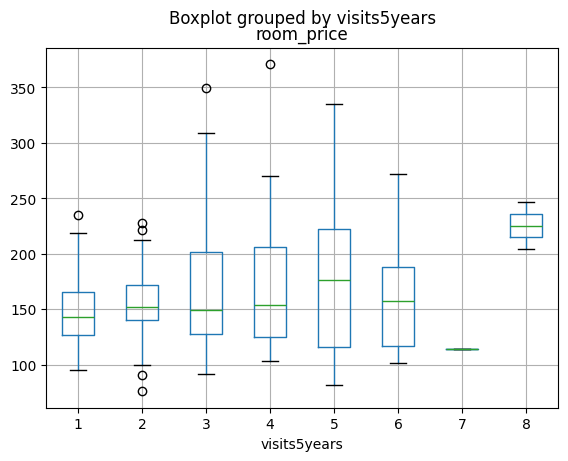

In [18]:
df_room_price_visits = df.boxplot(column = ['room_price'], by = 'visits5years', grid = True)

         total_expenditure
ranking                   
1              2755.964286
2              2693.243243
3              2445.239130
4              3141.500000
5              2627.526316
6              3358.000000
7              3028.000000


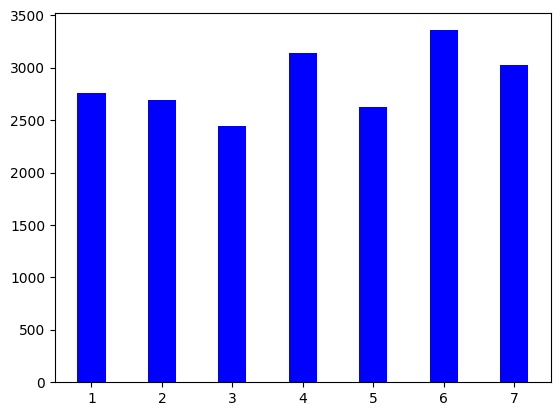

In [19]:
df_ranking_total_expenditure = df.groupby(['ranking'])[['total_expenditure']].mean()
print (df_ranking_total_expenditure)
plt.bar(df_ranking_total_expenditure.index, df_ranking_total_expenditure.total_expenditure, color = 'blue', width = 0.4)
plt.show()

In [20]:
print(df['visits2016'].describe(include = 'all'))
df_visits2016 = df['visits2016'] # Creating a new series
print(df_visits2016)
print(df_visits2016.shape)
print(df_visits2016.isna().sum())
df_visits2016 = df_visits2016.replace(to_replace=np.nan, value='Joined later') # Replacing nan to Joined later (meanwhile year 2016(, making it categorial)
df_visits2016 = df_visits2016.replace(to_replace=0, value ='Didnt visit') # Replacing 0 times to didnt visit (Categorial)
df_visits2016 = df_visits2016.mask(df['visits2016'] > 0, 'Visited', inplace=False) # Masking all visits to categorial 'Visited'
print(df_visits2016.head(60)) # Just checking myself..;)
df['2016Visits_new'] = df_visits2016

count    168.000000
mean       1.190476
std        1.043671
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: visits2016, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
193    3.0
194    3.0
195    3.0
196    2.0
197    3.0
Name: visits2016, Length: 198, dtype: float64
(198,)
30
0      Didnt visit
1      Didnt visit
2      Didnt visit
3      Didnt visit
4      Didnt visit
5      Didnt visit
6          Visited
7      Didnt visit
8      Didnt visit
9          Visited
10         Visited
11         Visited
12     Didnt visit
13         Visited
14         Visited
15         Visited
16         Visited
17     Didnt visit
18         Visited
19     Didnt visit
20     Didnt visit
21     Didnt visit
22     Didnt visit
23     Didnt visit
24         Visited
25     Didnt visit
26         Visited
27         Visited
28         Visited
29     Didnt visit
30         Visited
31     Didnt visit
32         Visited
33 

In [21]:
total_expenditure_new = df['total_expenditure']
total_expenditure_new = total_expenditure_new.mask(df['total_expenditure'] < 0, np.nan) # Removing negative numbers with nan
total_expenditure_new = total_expenditure_new.replace(to_replace=np.nan, value=df.total_expenditure.mean()) # Changing nan to mean
total_expenditure_new.describe()
exp_Q1 = total_expenditure_new.quantile(0.25) # Calculating quantiles for bins.
exp_Q2 = total_expenditure_new.quantile(0.5)
exp_Q3 = total_expenditure_new.quantile(0.75)
exp_Q4 = total_expenditure_new.quantile(1)
labels = ['Low', 'Mid','Mid-High', 'High'] # Labels making
expenditure_grouped = pd.cut(total_expenditure_new, bins=[0, exp_Q1, exp_Q2, exp_Q3, exp_Q4], labels=labels)
# Cuting by bins and labels so we would have categorial values seperated by quantiles.
print (expenditure_grouped)
df['total_expenditure_new'] = expenditure_grouped


0      Mid-High
1      Mid-High
2           Low
3           Low
4           Mid
         ...   
193        High
194        High
195        High
196    Mid-High
197        High
Name: total_expenditure, Length: 198, dtype: category
Categories (4, object): ['Low' < 'Mid' < 'Mid-High' < 'High']


In [22]:
df.room_price.describe()
print(df.room_price.describe())
print(df.room_price.median())
print(df.isna().sum())
df_room_price_new1 = df['room_price'].replace(to_replace=np.nan, value= df.room_price.median())
df_room_price_new2 = df['room_price'].replace(to_replace=np.nan, value= df.room_price.mean())
print(df.room_price.describe())
print(df_room_price_new1.describe())
print(df_room_price_new2.describe())

count    195.000000
mean     163.389744
std       52.920694
min       76.000000
25%      126.000000
50%      151.000000
75%      193.500000
max      371.000000
Name: room_price, dtype: float64
151.0
sex                       0
age                       0
status                    7
roomservice               0
room_price                3
region                    0
accomodation              0
nights                    0
minibar                   0
visits2016               30
visits5years              0
total_expenditure         0
club_member               7
ranking                   0
log_roomprice             3
2016Visits_new            0
total_expenditure_new     0
dtype: int64
count    195.000000
mean     163.389744
std       52.920694
min       76.000000
25%      126.000000
50%      151.000000
75%      193.500000
max      371.000000
Name: room_price, dtype: float64
count    198.000000
mean     163.202020
std       52.538114
min       76.000000
25%      126.000000
50%      151.000000

In [23]:
tot_expend_Z = df['total_expenditure']
tot_expend_Z = tot_expend_Z.mask(df['total_expenditure'] < 0, np.nan) # Same as 8A
tot_expend_Z = tot_expend_Z.replace(to_replace=np.nan, value=df.total_expenditure.mean()) # Same as 8A
tot_expend_Z = stats.zscore(tot_expend_Z) # Normalizing the series.
bins = np.unique([-3,-2,-1,0,1,2,3]) # Creating bins
labels = ['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6'] # Creating labels.
tot_expend_grouped_Z = pd.cut(tot_expend_Z, bins=bins, labels = labels) # Cutting the series by bins and labels
nan_amount = tot_expend_grouped_Z.isna().sum()
# Counting the amount of guests that who doesn't show in the new division.
print ('The number of nan is: ' ,nan_amount)
# Two guests aren't included.

The number of nan is:  2


In [24]:
minibar_Z = df['minibar'] # Copying the series so we wouldn't change the original.
minibar_Z = stats.zscore(minibar_Z) # Normalizing the series
print ('STD before normalization: ', df['minibar'].std())
print ('STD after normalization: ', minibar_Z.std())
minibar_Z.value_counts(bins=[-1,1]) # First option to count.
count = 0
for i in minibar_Z:
    if -1 < i < 1:
        count+=1
print (count)

STD before normalization:  6.07955639821501
STD after normalization:  1.0025348583126574
136
